In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Coding\Data Science\Datasets\AIDS_Classification_50000.csv")
df.sample(7)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
17902,828,3,20,67.24205,0,1,0,100,0,1,...,0,3,1,1,0,252,432,1032,771,0
28516,474,0,21,80.96065,0,0,0,100,1,1,...,1,3,0,0,0,235,340,812,1006,1
48739,476,3,40,70.44513,0,1,0,100,0,0,...,0,1,0,0,1,396,399,801,1458,0
46224,1028,2,33,88.05692,0,1,0,100,0,0,...,0,1,0,1,1,247,319,1437,1508,0
2616,1180,1,42,63.25196,0,1,0,100,0,1,...,1,3,0,1,0,243,244,2169,538,1
30358,1085,1,35,92.36579,0,1,0,100,0,0,...,0,1,0,0,0,226,656,2071,682,0
12261,774,0,32,82.38694,0,1,0,100,0,1,...,1,3,0,1,0,283,384,757,682,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [4]:
# All columns are numerical and there are no missing values
# So we can start further analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


In [6]:
df.duplicated().sum()

0

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

<Figure size 1100x700 with 0 Axes>

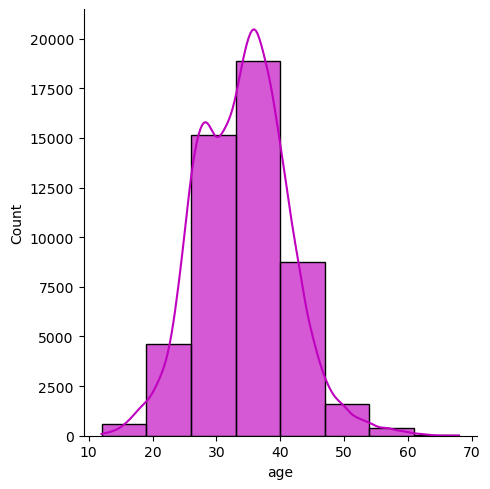

In [8]:
plt.figure(figsize = (11, 7))
sns.displot(data = df, x = 'age', bins = 8, kde = True, color = 'm', alpha = 0.65)
plt.show()

In [9]:
df['age'].skew()
# We can consider age to be almost normally distributed
# As is evident from the graphs as well

0.2103081587707646

In [10]:
df.infected.value_counts()

0    34494
1    15506
Name: infected, dtype: int64

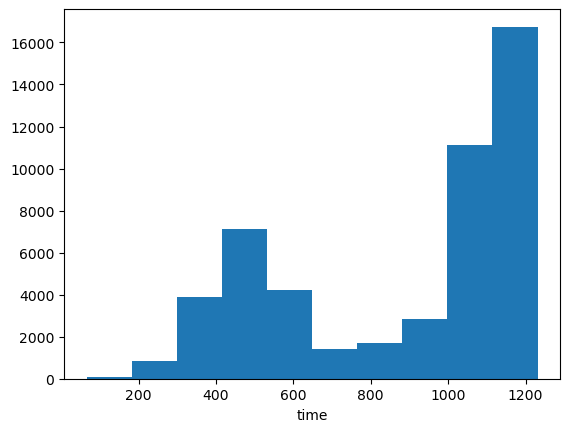

In [11]:
plt.hist(df['time'])
plt.xlabel('time')
plt.show()

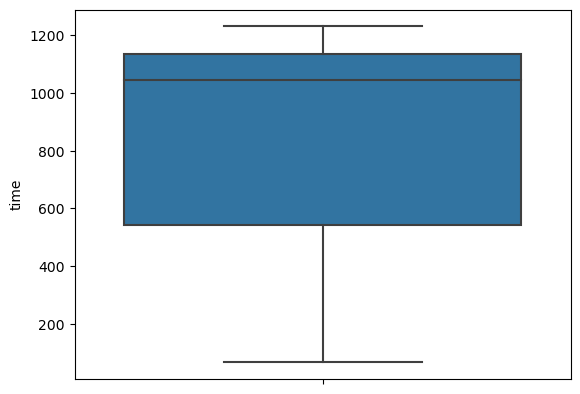

In [12]:
sns.boxplot(data = df, y = 'time', orient = 'v')
plt.ylabel('time')
plt.show()

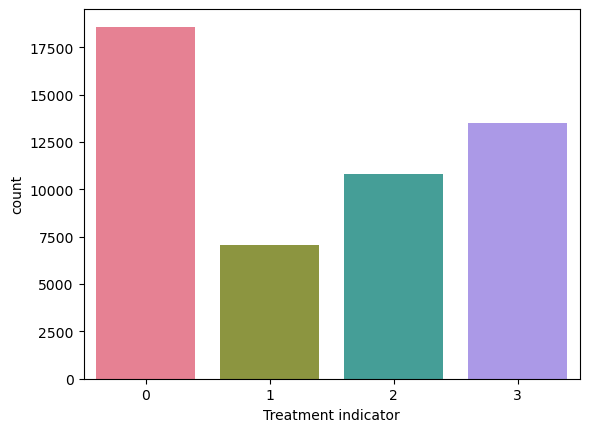

In [13]:
sns.countplot(data = df, x = 'trt', palette = 'husl')
plt.xlabel('Treatment indicator')
plt.show()

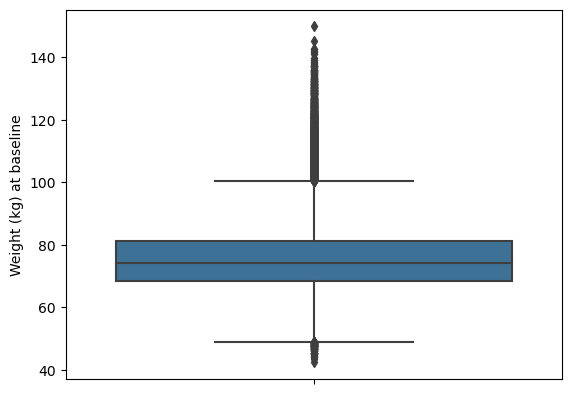

In [14]:
sns.boxplot(data = df, y = 'wtkg', orient = 'v', saturation = 0.6)
plt.ylabel('Weight (kg) at baseline')
plt.show()

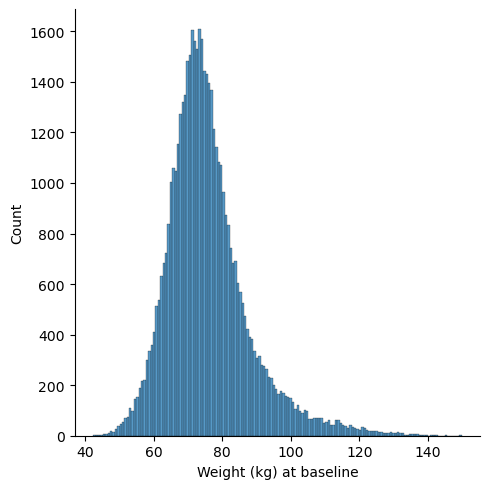

In [15]:
sns.displot(data = df, x = 'wtkg')
plt.xlabel('Weight (kg) at baseline')
plt.show()

In [16]:
df.hemo.value_counts()

0    48326
1     1674
Name: hemo, dtype: int64

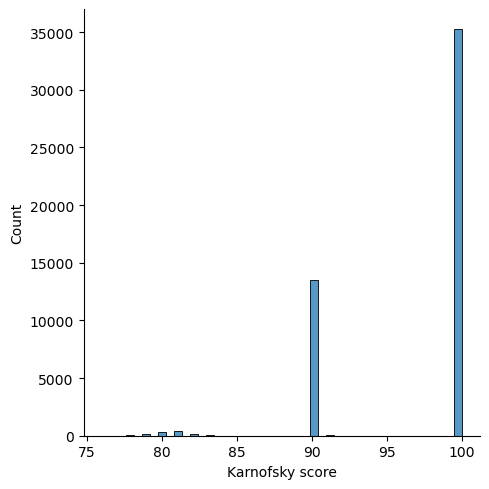

In [17]:
sns.displot(data = df, x = 'karnof')
plt.xlabel('Karnofsky score')
plt.show()

In [18]:
df.karnof.value_counts().sort_index()

76         1
77         2
78        24
79       173
80       331
81       400
82       185
83        49
84         2
89         5
90     13519
91        59
100    35250
Name: karnof, dtype: int64

In [19]:
df.homo.value_counts()

1    32677
0    17323
Name: homo, dtype: int64

In [20]:
df.drugs.value_counts()

0    43389
1     6611
Name: drugs, dtype: int64

In [21]:
df.race.value_counts()

0    35335
1    14665
Name: race, dtype: int64

In [22]:
df.z30.value_counts()

1    32044
0    17956
Name: z30, dtype: int64

In [23]:
df.oprior.value_counts()

0    47885
1     2115
Name: oprior, dtype: int64

In [24]:
df.gender.value_counts()

1    42835
0     7165
Name: gender, dtype: int64

In [25]:
df.strat.value_counts()

1    21730
3    18551
2     9719
Name: strat, dtype: int64

In [26]:
df.str2.value_counts()

1    28760
0    21240
Name: str2, dtype: int64

In [27]:
df.symptom.value_counts()

0    45827
1     4173
Name: symptom, dtype: int64

In [28]:
df.treat.value_counts()

1    36708
0    13292
Name: treat, dtype: int64

In [29]:
df.offtrt.value_counts()

0    32889
1    17111
Name: offtrt, dtype: int64

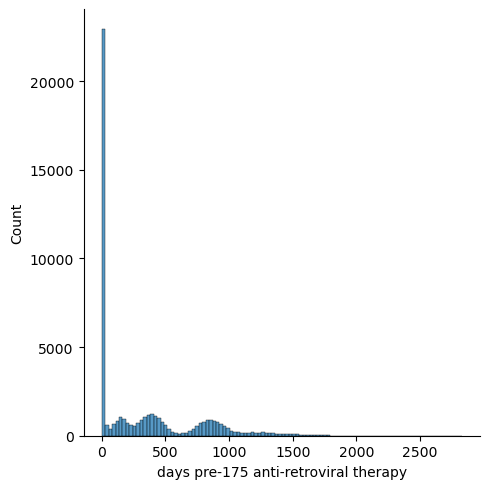

In [30]:
sns.displot(data = df, x = 'preanti')
plt.xlabel('days pre-175 anti-retroviral therapy')
plt.show()

In [31]:
df[df['preanti'] == 0].shape[0]
# Number of patients having preanti = 0

12905

In [32]:
df[df['preanti'] == 1].shape[0]

641

In [33]:
df[df['preanti'] == 2828].shape[0]

1

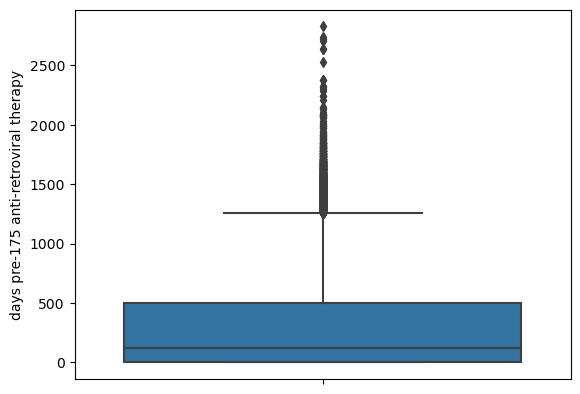

In [34]:
sns.boxplot(data = df, y = 'preanti', orient = 'v')
plt.ylabel('days pre-175 anti-retroviral therapy')
plt.show()

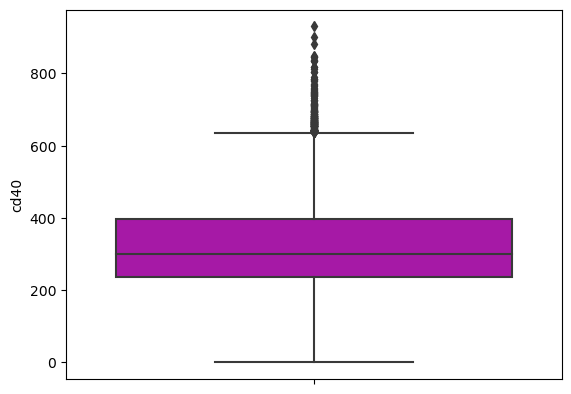

In [35]:
sns.boxplot(y = 'cd40', data = df, saturation = 0.74, orient = 'v', color = 'm')
plt.show()

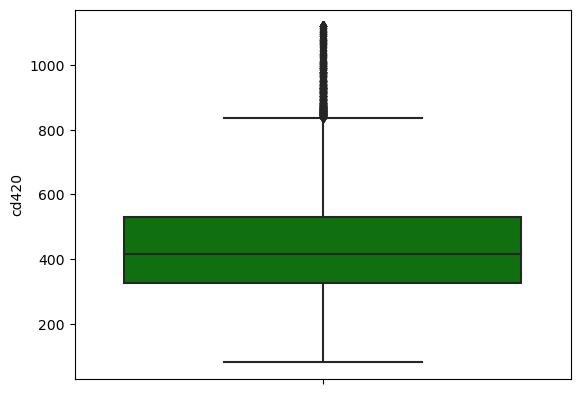

In [36]:
sns.boxplot(y = 'cd420', data = df, saturation = 0.75, orient = 'v', color = 'g')
plt.show()

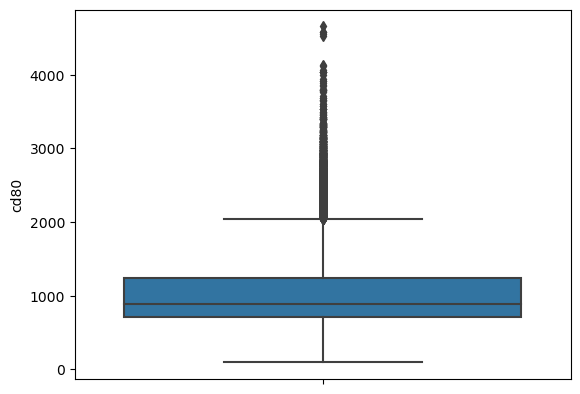

In [37]:
sns.boxplot(y = 'cd80', data = df, orient = 'v')
plt.show()

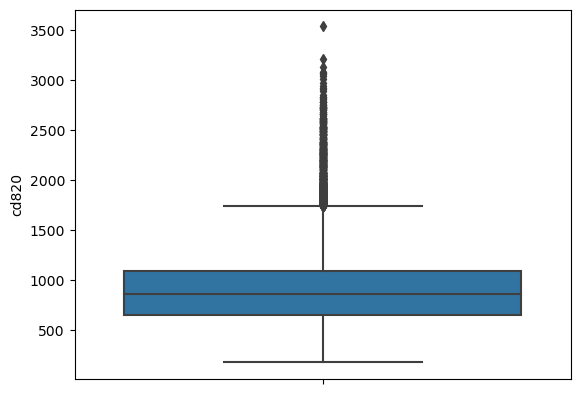

In [38]:
sns.boxplot(y = 'cd820', data = df, orient = 'v')
plt.show()

In [39]:
infected_df = pd.DataFrame(df.corr()['infected'])
infected_df

,infected
time,-0.102671
trt,-0.047112
age,0.028718
wtkg,-0.055527
hemo,0.026407
homo,-0.007341
drugs,-0.025684
karnof,-0.025860
oprior,0.043416
z30,0.238531


In [40]:
# karnof has a weird distribution and it is not correlated to the target column as well
# So I am getting rid of it

df.drop('karnof', axis = 1, inplace = True)

# Models

### First I am using Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state = 20)

In [42]:
log = LogisticRegression(max_iter = 1400)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1400)

In [43]:
y_pred_lr = log.predict(X_test)
y_pred_lr.shape

(9500,)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy of Logistic Regression : ", accuracy_score(y_test, y_pred_lr))

Accuracy of Logistic Regression :  0.7137894736842105


In [45]:
print(confusion_matrix(y_test, y_pred_lr))

[[6090  478]
 [2241  691]]


In [46]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      6568
           1       0.59      0.24      0.34      2932

    accuracy                           0.71      9500
   macro avg       0.66      0.58      0.58      9500
weighted avg       0.69      0.71      0.67      9500



### Using Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
tree_params = [{'min_samples_leaf': [100, 125, 140, 160], 'max_features': [None, 9, 13, 16],
                'min_samples_split': [100, 200, 300, 400]}]

In [49]:
tree_search = GridSearchCV(estimator = dt, param_grid = tree_params, cv = 10, scoring = 'accuracy')
tree_search = tree_search.fit(X_train, y_train)

In [50]:
tree_search.best_score_

0.7004938271604939

In [51]:
tree_search.best_params_

{'max_features': 13, 'min_samples_leaf': 160, 'min_samples_split': 100}

In [53]:
dt = DecisionTreeClassifier(min_samples_leaf = 160, max_features = 13, min_samples_split = 100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features=13, min_samples_leaf=160,
                       min_samples_split=100)

In [54]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
print("Accuracy of Decision Tree : ", accuracy_score(y_test, y_pred_dt))

Accuracy of Decision Tree :  0.6992631578947368


In [56]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.91      0.81      6568
           1       0.53      0.23      0.32      2932

    accuracy                           0.70      9500
   macro avg       0.63      0.57      0.56      9500
weighted avg       0.66      0.70      0.66      9500



### Now using Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print("Accuracy of Gaussian Naive Bayes : ", accuracy_score(y_test, y_pred_gnb))

Accuracy of Gaussian Naive Bayes :  0.6613684210526316


In [58]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      6568
           1       0.46      0.58      0.51      2932

    accuracy                           0.66      9500
   macro avg       0.62      0.64      0.63      9500
weighted avg       0.69      0.66      0.67      9500



In [59]:
# Gaussian Naive Bayes has a lower accuracy as compared to Logistic regression and Decision tree
# but it has a better recall and f1-score for the cases where AIDS was found (1).

### Now I am going to use K Nearest Neighbors
### So I am first going to scale the data

In [60]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()

# Robust scaler is used because there are a lot of outliers in columns like cd40, cd420, preanti, etc.

X_train_rb = robust.fit_transform(X_train)
X_test_rb = robust.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
test_error_rates = []

for k in range(30, 90):
    knn_mod = KNeighborsClassifier(n_neighbors = k)
    knn_mod.fit(X_train, y_train)
    
    y_pred_test = knn_mod.predict(X_test)
    test_error1 = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error1)

test_error_rates

[0.3047368421052632,
 0.3053684210526316,
 0.3047368421052632,
 0.3052631578947368,
 0.3056842105263158,
 0.3053684210526316,
 0.30494736842105263,
 0.30410526315789477,
 0.3032631578947368,
 0.30315789473684207,
 0.3037894736842105,
 0.30305263157894735,
 0.3023157894736842,
 0.30294736842105263,
 0.30315789473684207,
 0.3013684210526316,
 0.3038947368421052,
 0.30210526315789477,
 0.30315789473684207,
 0.3043157894736842,
 0.30315789473684207,
 0.3028421052631579,
 0.30347368421052634,
 0.30357894736842106,
 0.3042105263157895,
 0.3017894736842105,
 0.3028421052631579,
 0.30252631578947364,
 0.30410526315789477,
 0.3042105263157895,
 0.30357894736842106,
 0.3008421052631579,
 0.3026315789473685,
 0.30063157894736847,
 0.3028421052631579,
 0.3004210526315789,
 0.3037894736842105,
 0.3022105263157895,
 0.30410526315789477,
 0.3032631578947368,
 0.3038947368421052,
 0.30410526315789477,
 0.3046315789473685,
 0.3043157894736842,
 0.3053684210526316,
 0.3042105263157895,
 0.30452631578947

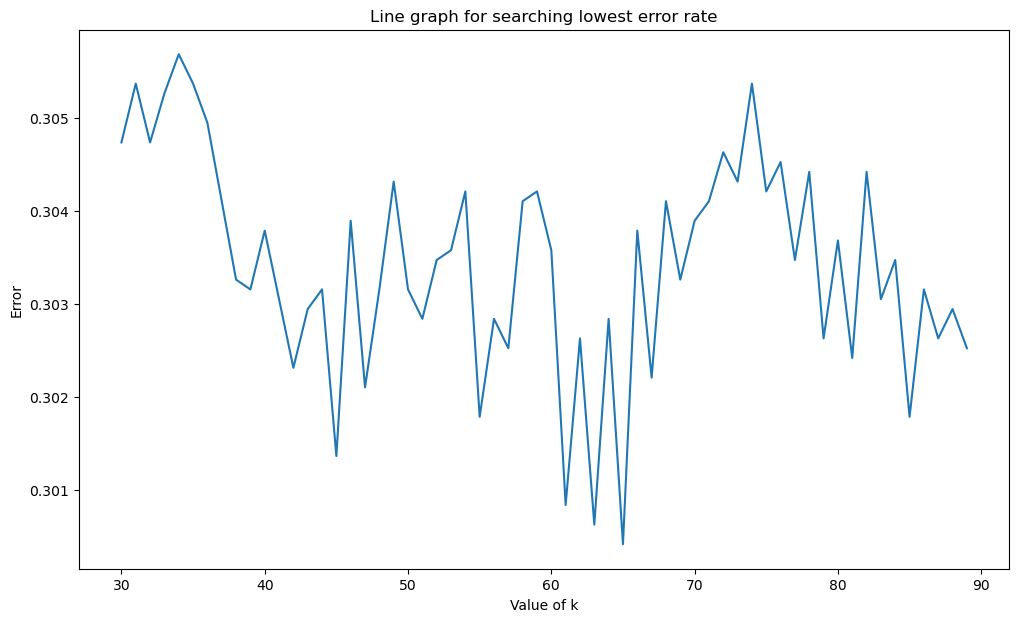

In [63]:
plt.figure(figsize = (12, 7))
plt.plot(range(30, 90), test_error_rates)
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.title("Line graph for searching lowest error rate")
plt.show()

In [64]:
min_value = 1000
min_index = -1

for index, value in enumerate(test_error_rates):
    if value < min_value:
        min_value = value
        min_index = index

print("Minimum value:", min_value)
print("Index of minimum value:", 30 + min_index)


Minimum value: 0.3004210526315789
Index of minimum value: 65


In [65]:
# The rates are not fluctuating too much now
# I think this much iteration is fine

In [66]:
knn = KNeighborsClassifier(n_neighbors = min_index)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy_score(y_test, prediction)

0.6946315789473684

In [67]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81      6568
           1       0.52      0.15      0.23      2932

    accuracy                           0.69      9500
   macro avg       0.62      0.54      0.52      9500
weighted avg       0.65      0.69      0.63      9500



### Now I will apply Voting ensemble to make a collective prediction out of all the models

In [68]:
from sklearn.ensemble import VotingClassifier

models = [('lr', log), ('dt', dt), ('gnb', gnb), ('knn', knn)]

In [69]:
clf = VotingClassifier(estimators = models, voting = 'hard')
clf = clf.fit(X_train, y_train)
vote_pred = clf.predict(X_test)

In [70]:
print("Hard voting accuracy : ", accuracy_score(y_test, vote_pred))

Hard voting accuracy :  0.7111578947368421


In [71]:
print(classification_report(y_test, vote_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82      6568
           1       0.60      0.20      0.30      2932

    accuracy                           0.71      9500
   macro avg       0.66      0.57      0.56      9500
weighted avg       0.68      0.71      0.66      9500



In [72]:
parameters = [{'weights': [[2, 2, 1, 2], [2, 2, 4, 1], [2, 2, 3, 1], [3, 3, 2, 1]]}]
search = GridSearchCV(estimator = clf, param_grid = parameters, scoring = 'recall', cv = 4)

search = search.fit(X_train, y_train)

In [73]:
search.best_score_

0.33609005006480736

In [74]:
search.best_params_

{'weights': [2, 2, 4, 1]}

In [75]:
clf2 = VotingClassifier(estimators = models, voting = 'hard', weights = [2, 2, 4, 1])
clf2 = clf2.fit(X_train, y_train)
weighted_vote_pred = clf2.predict(X_test)

print("Weighted voting accuracy : ", accuracy_score(y_test, weighted_vote_pred))

Weighted voting accuracy :  0.7077894736842105


In [76]:
print(classification_report(y_test, weighted_vote_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6568
           1       0.54      0.35      0.42      2932

    accuracy                           0.71      9500
   macro avg       0.65      0.61      0.61      9500
weighted avg       0.68      0.71      0.69      9500



Here I am getting a decent accuracy and the recall & f1 scores aren't too bad either